<a href="https://colab.research.google.com/github/Priya-gawhane/Machine-learning-prediction-Models-Projects/blob/main/Sign_language_recognisition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [35]:
import string
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Data collection and preprocessing

In [36]:
df = pd.read_csv('/content/TrainData.csv')
df.head()


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0


In [37]:
def load_data(path):
	df = pd.read_csv(path)
	y = np.array([label if label < 9
				else label-1 for label in df['label']])
	df = df.drop('label', axis=1)
	x = np.array([df.iloc[i].to_numpy().reshape((28, 28))
				for i in range(len(df))]).astype(float)
	x = np.expand_dims(x, axis=3)
	y = pd.get_dummies(y).values

	return x, y

X_train, Y_train = load_data('/content/TrainData.csv')
X_test, Y_test = load_data('/content/TestData.csv')


In [38]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(12844, 28, 28, 1) (12844, 26)
(4267, 28, 28, 1) (4267, 26)


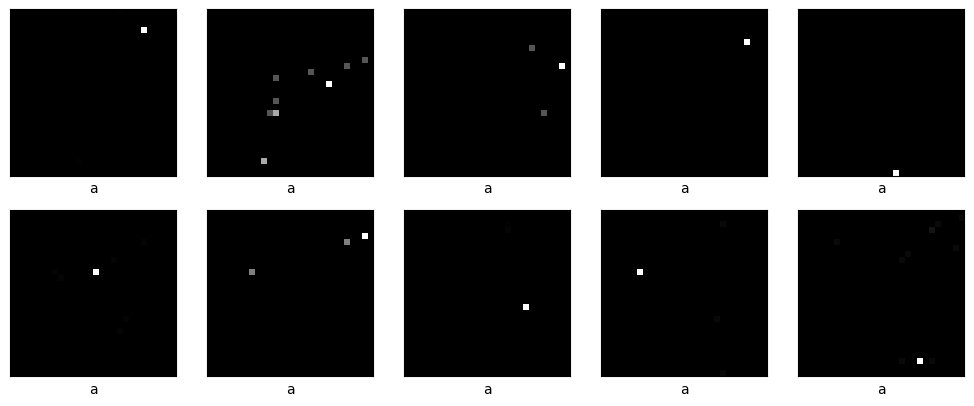

In [39]:
class_names = list(string.ascii_lowercase[:26].replace(
	'j', '').replace('z', ''))

plt.figure(figsize=(10, 10))
for i in range(10):
	plt.subplot(5, 5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(X_train[i].squeeze(), cmap=plt.cm.binary)
	plt.xlabel(class_names[np.argmax(Y_train, axis=1)[i]])
plt.tight_layout()
plt.show()


In [40]:
model = tf.keras.models.Sequential([
	tf.keras.layers.Conv2D(filters=32,
						kernel_size=(3, 3),
						activation='relu',
						input_shape=(28, 28, 1)),
	tf.keras.layers.MaxPooling2D(2, 2),

	tf.keras.layers.Conv2D(filters=64,
						kernel_size=(3, 3),
						activation='relu'),
	tf.keras.layers.MaxPooling2D(2, 2),

	tf.keras.layers.Flatten(),
	tf.keras.layers.BatchNormalization(),
	tf.keras.layers.Dense(256, activation='relu'),
	tf.keras.layers.Dropout(0.3),
	tf.keras.layers.BatchNormalization(),
	tf.keras.layers.Dense(24, activation='softmax')
])


In [41]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 batch_normalization_2 (Bat  (None, 1600)             

In [42]:
model.compile(
	optimizer='adam',
	loss='categorical_crossentropy',
	metrics=['accuracy']
)


In [43]:
!pip install tensorflow
!pip install keras

In [44]:
import tensorflow as tf
from tensorflow import keras

In [45]:
print("train_generator" in globals())
print("val_generator" in globals())

False
False


In [46]:
!pip install tensorflow
!pip install keras

In [47]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [48]:
print(globals())

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', 'import string\nimport pandas as pd\nimport numpy as np\nimport tensorflow as tf\nfrom tensorflow.keras.preprocessing.image import ImageDataGenerator\nimport matplotlib.pyplot as plt', "df = pd.read_csv('/content/TrainData.csv')\ndf.head()", "def load_data(path):\n\tdf = pd.read_csv(path)\n\ty = np.array([label if label < 9\n\t\t\t\telse label-1 for label in df['label']])\n\tdf = df.drop('label', axis=1)\n\tx = np.array([df.iloc[i].to_numpy().reshape((28, 28))\n\t\t\t\tfor i in range(len(df))]).astype(float)\n\tx = np.expand_dims(x, axis=3)\n\ty = pd.get_dummies(y).values\n\n\treturn x, y\n\nX_train, Y_train = load_data('/content/TrainData.csv')\nX_test, Y_test = load_data('/content/TestData.csv')", 'print(X_train.shape,

In [49]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
import torchvision.transforms as T
from torchvision.utils import make_grid
from torchvision.utils import save_image
from tqdm import tqdm
from PIL import Image

import torch.nn.functional as F
from sklearn.model_selection import train_test_split

In [50]:
train = pd.read_csv('/content/TrainData.csv')

imgarray = train.drop('label',axis=1).values.reshape(-1,28,28,1)

X_train,X_test,y_train,y_test = train_test_split(imgarray,train['label'])

train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0


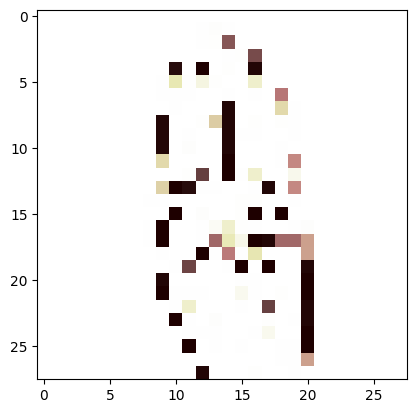

In [51]:
plt.imshow(train.iloc[train.loc[train['label'
                                  ] == 2].first_valid_index(
), :-1].values.reshape((28, 28)), cmap='pink')

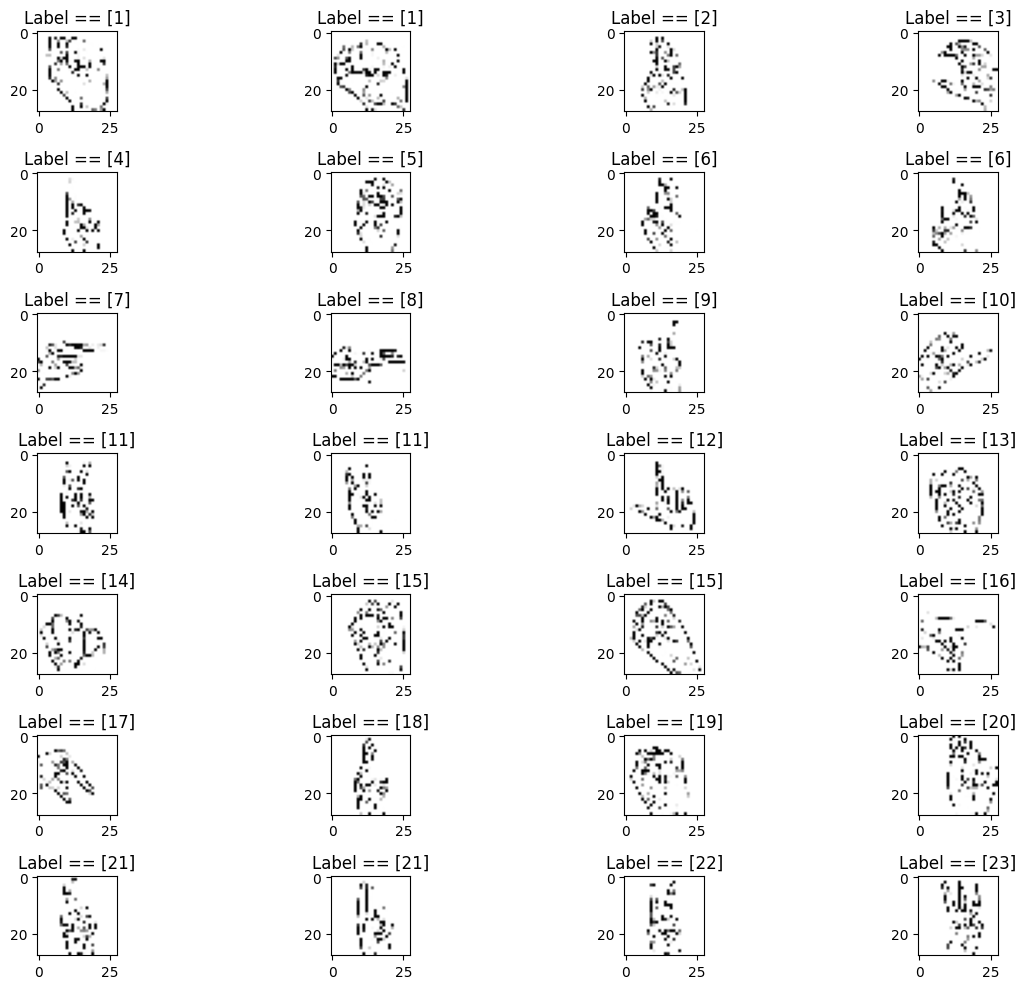

In [52]:
# fig = plt.figure(figsize=(20,15))

fig,ax = plt.subplots(7,4,figsize=(15,10))

base = 464

for i in range(0,7):
    for j in range(0,4):
        ax[i, j].set_title("Label == {}".format(
            train.loc[train.label.index == base, 'label'].values))
        ax[i,j].imshow(train.iloc[base,:-1].values.reshape((28, 28)), cmap='gray')
        base+=400
        plt.tight_layout()

In [53]:
plt.figure(figsize=(10,14))
i = Image.fromarray(train.iloc[1,:-1].values.astype(np.uint8).reshape(28,28))
width,height = i.size
print(width,height)

28 28


<Figure size 1000x1400 with 0 Axes>

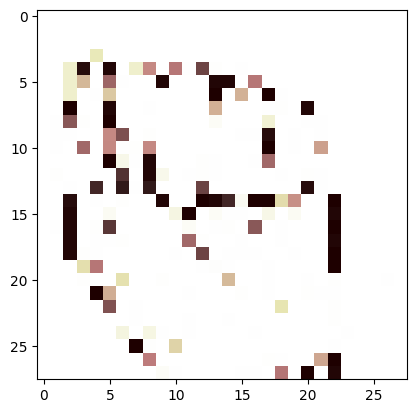

In [54]:
plt.imshow(train.iloc[499, :-1].values.reshape((28, 28)), cmap='pink')

In [55]:
class CustomLoader(Dataset):
    def __init__(self,array,label,transforms=None):
        self.array = array
        self.label = label
        self.transform = transforms

    def __len__(self):
        return len(self.array)
    def __getitem__(self,idx):
        i = self.transform(self.array[idx].astype(np.uint8))
        return i,self.label[idx]

In [56]:
# train.iloc[2].values.astype(np.uint8)
transforms = T.Compose([T.ToPILImage(),T.Resize((28,28)),T.ToTensor()])
dset = CustomLoader(X_train,label=y_train.values,transforms=transforms)
loader = DataLoader(dset,batch_size=64)

In [57]:
def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid((images.detach()), nrow=8).permute(1,2, 0))

def show_batch(dl, nmax=64):

    for (images, labels) in dl:
        show_images(images, nmax)
        break

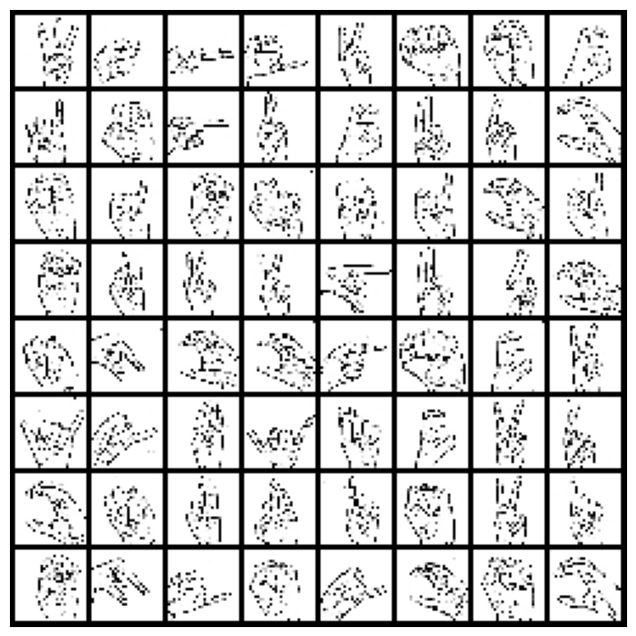

In [58]:
show_batch(loader)

In [59]:
class Net(nn.Module):
    '''
    THIS NN PASSES
    IMAGE FROM 3 CONV LAYERS , THEN
    IT CONNECTS TO THE FULLY CONN. LAYER
    '''

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 24, 3)
        self.fc1 = nn.Linear(24*2*2, 64)  # dim=1 passes data in batches
        self.fc2 = nn.Linear(64, 27)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size=2)
        x = F.max_pool2d(F.relu(self.conv2(x)), kernel_size=2)
        x = F.relu(self.conv3(x))
        x = x.view(-1, 24*2*2)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [60]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [61]:
model = Net()
criterion = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(model.parameters(),lr=0.0003)

In [62]:
if torch.cuda.is_available():
    model.cuda()

EPOCHS = 50

for epoch in tqdm(range(EPOCHS)):
    epoch_acc = [0]
    epoch_loss = [0]
    model.train()

    optimiser.zero_grad()
    for (images, labels) in loader:
        correct = 0
        images = images.to(device)
        labels = labels.to(device)

        output = model(images)
        loss = criterion(output, labels)
        epoch_loss.append(loss.item())

        _, output = torch.max(output.data, 1)

        correct += ((output == labels).sum())/len(images)

        train_acc = torch.sum(output == labels).item()/len(images)
        loss.backward()
        optimiser.step()
        if train_acc > max(epoch_acc):
            torch.save(model.state_dict(), 'signdetection.pth')
        epoch_acc.append(train_acc)
    print(
        f'after {epoch} epochs the loss is {np.mean(epoch_loss)} and epoch accuracy is {np.mean(epoch_acc)}')

  2%|▏         | 1/50 [00:03<02:51,  3.50s/it]

after 0 epochs the loss is 3.2759563671915153 and epoch accuracy is 0.03803453947368421


  4%|▍         | 2/50 [00:05<02:10,  2.72s/it]

after 1 epochs the loss is 3.2744443212684833 and epoch accuracy is 0.03813733552631579


  6%|▌         | 3/50 [00:07<01:56,  2.48s/it]

after 2 epochs the loss is 3.273114507135592 and epoch accuracy is 0.03813733552631579


  8%|▊         | 4/50 [00:10<01:48,  2.36s/it]

after 3 epochs the loss is 3.27168071269989 and epoch accuracy is 0.037623355263157895


 10%|█         | 5/50 [00:12<01:44,  2.31s/it]

after 4 epochs the loss is 3.2700063037244895 and epoch accuracy is 0.03720594098883573


 12%|█▏        | 6/50 [00:14<01:46,  2.42s/it]

after 5 epochs the loss is 3.267788069812875 and epoch accuracy is 0.03996897428229665


 14%|█▍        | 7/50 [00:17<01:41,  2.35s/it]

after 6 epochs the loss is 3.2644801798619723 and epoch accuracy is 0.03966058612440191


 16%|█▌        | 8/50 [00:19<01:36,  2.30s/it]

after 7 epochs the loss is 3.259296459586997 and epoch accuracy is 0.04007177033492823


 18%|█▊        | 9/50 [00:21<01:33,  2.27s/it]

after 8 epochs the loss is 3.2502139634207676 and epoch accuracy is 0.06256541566985646


 20%|██        | 10/50 [00:23<01:31,  2.28s/it]

after 9 epochs the loss is 3.2321505766165886 and epoch accuracy is 0.1003943630382775


 22%|██▏       | 11/50 [00:26<01:32,  2.36s/it]

after 10 epochs the loss is 3.1911370424847854 and epoch accuracy is 0.1340086722488038


 24%|██▍       | 12/50 [00:28<01:27,  2.30s/it]

after 11 epochs the loss is 3.062868645316676 and epoch accuracy is 0.15528122507974482


 26%|██▌       | 13/50 [00:30<01:24,  2.27s/it]

after 12 epochs the loss is 2.6919159528456236 and epoch accuracy is 0.2127504485645933


 28%|██▊       | 14/50 [00:32<01:20,  2.25s/it]

after 13 epochs the loss is 2.249626312600939 and epoch accuracy is 0.32324374501594894


 30%|███       | 15/50 [00:35<01:17,  2.21s/it]

after 14 epochs the loss is 1.7751848783932234 and epoch accuracy is 0.4502498255582137


 32%|███▏      | 16/50 [00:37<01:18,  2.32s/it]

after 15 epochs the loss is 1.4020682149811794 and epoch accuracy is 0.5432553329346093


 34%|███▍      | 17/50 [00:39<01:15,  2.30s/it]

after 16 epochs the loss is 1.0716711427820356 and epoch accuracy is 0.6442976226076556


 36%|███▌      | 18/50 [00:42<01:12,  2.28s/it]

after 17 epochs the loss is 0.9355262137557331 and epoch accuracy is 0.6844784190590111


 38%|███▊      | 19/50 [00:44<01:09,  2.24s/it]

after 18 epochs the loss is 0.7744905709436065 and epoch accuracy is 0.7302226624800637


 40%|████      | 20/50 [00:46<01:06,  2.23s/it]

after 19 epochs the loss is 0.6589620003574773 and epoch accuracy is 0.7658928927432216


 42%|████▏     | 21/50 [00:49<01:08,  2.35s/it]

after 20 epochs the loss is 0.6031980410610375 and epoch accuracy is 0.7838635117623604


 44%|████▍     | 22/50 [00:51<01:04,  2.32s/it]

after 21 epochs the loss is 0.5858404412865639 and epoch accuracy is 0.7885017942583732


 46%|████▌     | 23/50 [00:53<01:01,  2.29s/it]

after 22 epochs the loss is 0.5181132899107117 and epoch accuracy is 0.8128582286682615


 48%|████▊     | 24/50 [00:55<00:58,  2.26s/it]

after 23 epochs the loss is 0.43843745244176763 and epoch accuracy is 0.839373380183413


 50%|█████     | 25/50 [00:57<00:56,  2.25s/it]

after 24 epochs the loss is 0.3602300279430653 and epoch accuracy is 0.8687419009170654


 52%|█████▏    | 26/50 [01:00<00:56,  2.35s/it]

after 25 epochs the loss is 0.33916301966497775 and epoch accuracy is 0.8740156499202552


 54%|█████▍    | 27/50 [01:02<00:53,  2.31s/it]

after 26 epochs the loss is 0.2986518672030223 and epoch accuracy is 0.8938428279505581


 56%|█████▌    | 28/50 [01:04<00:50,  2.27s/it]

after 27 epochs the loss is 0.30393314513524894 and epoch accuracy is 0.8879834529505581


 58%|█████▊    | 29/50 [01:07<00:47,  2.26s/it]

after 28 epochs the loss is 0.3172266574968633 and epoch accuracy is 0.8832548345295056


 60%|██████    | 30/50 [01:09<00:45,  2.29s/it]

after 29 epochs the loss is 0.27591793160689504 and epoch accuracy is 0.8977428478867623


 62%|██████▏   | 31/50 [01:11<00:44,  2.34s/it]

after 30 epochs the loss is 0.22517340475889414 and epoch accuracy is 0.9195543012360446


 64%|██████▍   | 32/50 [01:14<00:41,  2.29s/it]

after 31 epochs the loss is 0.194197495124842 and epoch accuracy is 0.9263139204545454


 66%|██████▌   | 33/50 [01:17<00:42,  2.52s/it]

after 32 epochs the loss is 0.17172521945873373 and epoch accuracy is 0.933933288476874


 68%|██████▊   | 34/50 [01:19<00:38,  2.43s/it]

after 33 epochs the loss is 0.20158110017349062 and epoch accuracy is 0.9235321969696969


 70%|███████   | 35/50 [01:22<00:37,  2.49s/it]

after 34 epochs the loss is 0.20839673055237845 and epoch accuracy is 0.9206601375598086


 72%|███████▏  | 36/50 [01:24<00:33,  2.41s/it]

after 35 epochs the loss is 0.14691874139795177 and epoch accuracy is 0.9417146381578947


 74%|███████▍  | 37/50 [01:26<00:30,  2.35s/it]

after 36 epochs the loss is 0.11433280687043934 and epoch accuracy is 0.9538508024322169


 76%|███████▌  | 38/50 [01:28<00:27,  2.31s/it]

after 37 epochs the loss is 0.11130489366080024 and epoch accuracy is 0.955797697368421


 78%|███████▊  | 39/50 [01:30<00:25,  2.29s/it]

after 38 epochs the loss is 0.10633891320934422 and epoch accuracy is 0.9594017892743222


 80%|████████  | 40/50 [01:33<00:23,  2.38s/it]

after 39 epochs the loss is 0.10810909632250275 and epoch accuracy is 0.9573396381578947


 82%|████████▏ | 41/50 [01:35<00:20,  2.31s/it]

after 40 epochs the loss is 0.09895906121911187 and epoch accuracy is 0.9615667364433812


 84%|████████▍ | 42/50 [01:37<00:18,  2.27s/it]

after 41 epochs the loss is 0.07361287386524246 and epoch accuracy is 0.9674136513157895


 86%|████████▌ | 43/50 [01:40<00:15,  2.24s/it]

after 42 epochs the loss is 0.0688871746564186 and epoch accuracy is 0.9722512958532695


 88%|████████▊ | 44/50 [01:42<00:13,  2.23s/it]

after 43 epochs the loss is 0.06469926188430308 and epoch accuracy is 0.970703125


 90%|█████████ | 45/50 [01:44<00:11,  2.34s/it]

after 44 epochs the loss is 0.058755421575992124 and epoch accuracy is 0.976054749800638


 92%|█████████▏| 46/50 [01:47<00:09,  2.30s/it]

after 45 epochs the loss is 0.05905346521544025 and epoch accuracy is 0.973375822368421


 94%|█████████▍| 47/50 [01:49<00:06,  2.28s/it]

after 46 epochs the loss is 0.05777462786308637 and epoch accuracy is 0.9753351774322169


 96%|█████████▌| 48/50 [01:51<00:04,  2.35s/it]

after 47 epochs the loss is 0.05934683456526775 and epoch accuracy is 0.9732730263157895


 98%|█████████▊| 49/50 [01:53<00:02,  2.30s/it]

after 48 epochs the loss is 0.061619082569928936 and epoch accuracy is 0.9736904405901117


100%|██████████| 50/50 [01:57<00:00,  2.34s/it]

after 49 epochs the loss is 0.05846653818949371 and epoch accuracy is 0.9745065789473685


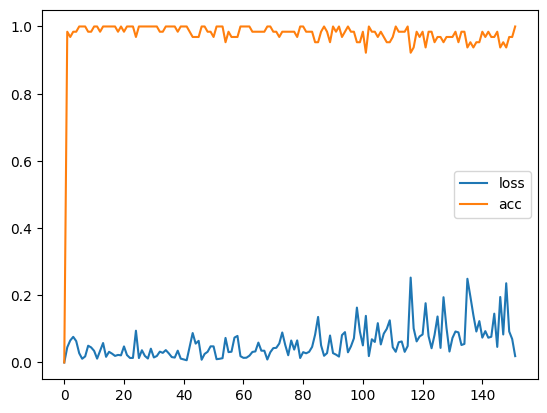

In [63]:
plt.plot(epoch_loss,label='loss')
plt.plot(epoch_acc, label='acc')
plt.legend()
plt.show()

In [64]:
val_set = CustomLoader(X_test,y_test.values,transforms=transforms)
val_loader = DataLoader(val_set,batch_size=64)

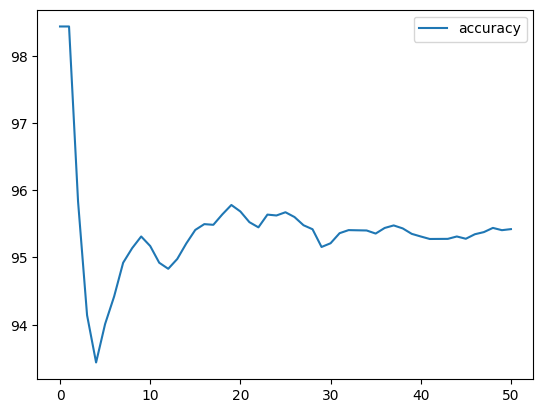

In [65]:
model.load_state_dict(torch.load('./signdetection.pth'))
model.eval()
val_acc_list = []
val_loss_list = []
val_acc, correct_val, val_loss, target_count = 0, 0, 0, 0
for i, (input, target) in enumerate(val_loader):
    target_var = target.to(device)
    input_var = input.to(device)
    output = model(input_var)
    loss = criterion(output, target_var)
    val_loss += loss.item()
    val_loss_list.append(val_loss)
    # accuracy
    _, predicted = torch.max(output.data, 1)
    target_count += target_var.size(0)
    correct_val += (target_var == predicted).sum().item()
    val_acc = 100 * correct_val / target_count
    val_acc_list.append(val_acc)
#     print(f'accuracy --> {val_acc} and loss --> {val_loss}')

plt.plot(val_acc_list, label='accuracy')
# plt.plot(val_loss_list,label='loss')
plt.legend()
plt.show()
